In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/abasar/Downloads/infy.csv")
df = df.query("Series == 'EQ'")
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,24-Oct-2017,939.50,946.00,946.65,921.60,924.35,926.50,933.61,7264664,6.782341e+09,117978,5282209,72.71
1,INFY,EQ,25-Oct-2017,926.50,919.00,944.70,915.25,934.25,935.30,934.05,6992067,6.530973e+09,176833,4211146,60.23
2,INFY,EQ,26-Oct-2017,935.30,942.00,951.80,940.10,948.55,947.35,946.46,16829629,1.592860e+10,144857,13667670,81.21
3,INFY,EQ,27-Oct-2017,947.35,955.00,957.70,944.00,947.00,946.35,948.86,4262478,4.044495e+09,108092,3305472,77.55
4,INFY,EQ,30-Oct-2017,946.35,954.65,954.65,941.05,943.90,944.10,946.96,6484163,6.140239e+09,120848,5395557,83.21


In [3]:
df.Date.dtype

dtype('O')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 493
Data columns (total 15 columns):
Symbol                    492 non-null object
Series                    492 non-null object
Date                      492 non-null object
Prev Close                492 non-null float64
Open Price                492 non-null float64
High Price                492 non-null float64
Low Price                 492 non-null float64
Last Price                492 non-null float64
Close Price               492 non-null float64
Average Price             492 non-null float64
Total Traded Quantity     492 non-null int64
Turnover                  492 non-null float64
No. of Trades             492 non-null int64
Deliverable Qty           492 non-null int64
% Dly Qt to Traded Qty    492 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 61.5+ KB


In [5]:
pd.to_datetime(df.Date).dtype

dtype('<M8[ns]')

In [6]:
df.index = pd.to_datetime(df.Date)

In [7]:
y = df["Close Price"]
y

Date
2017-10-24    926.50
2017-10-25    935.30
2017-10-26    947.35
2017-10-27    946.35
2017-10-30    944.10
               ...  
2019-10-16    771.45
2019-10-17    769.50
2019-10-18    767.85
2019-10-22    643.55
2019-10-23    650.60
Name: Close Price, Length: 492, dtype: float64

In [8]:
y.head(20)

Date
2017-10-24    926.50
2017-10-25    935.30
2017-10-26    947.35
2017-10-27    946.35
2017-10-30    944.10
2017-10-31    921.85
2017-11-01    927.05
2017-11-02    922.90
2017-11-03    926.65
2017-11-06    928.70
2017-11-07    955.50
2017-11-08    952.30
2017-11-09    954.50
2017-11-10    962.05
2017-11-13    951.95
2017-11-14    949.10
2017-11-15    951.80
2017-11-16    988.40
2017-11-17    970.95
2017-11-20    960.55
Name: Close Price, dtype: float64

In [9]:
y.index

DatetimeIndex(['2017-10-24', '2017-10-25', '2017-10-26', '2017-10-27',
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06',
               ...
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14',
               '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-22', '2019-10-23'],
              dtype='datetime64[ns]', name='Date', length=492, freq=None)

In [10]:
y = y.asfreq("B")

In [11]:
y[y.index.duplicated()]

Series([], Freq: B, Name: Close Price, dtype: float64)

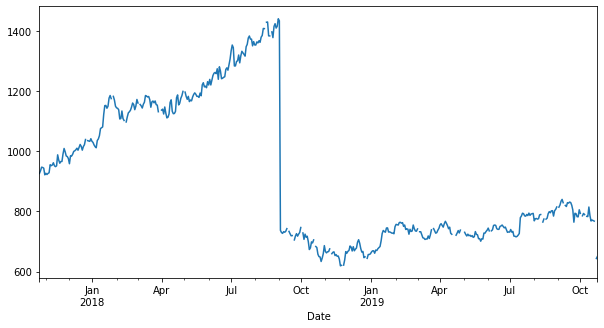

In [12]:
plt.figure(figsize = (10, 5))
y.plot()

In [13]:
y[y.index > "2018-09"].head(20)

Date
2018-09-03    1434.25
2018-09-04     737.15
2018-09-05     729.90
2018-09-06     727.15
2018-09-07     732.80
2018-09-10     730.85
2018-09-11     734.30
2018-09-12     742.90
2018-09-13        NaN
2018-09-14     733.70
2018-09-17     725.95
2018-09-18     719.10
2018-09-19     719.75
2018-09-20        NaN
2018-09-21     705.30
2018-09-24     718.25
2018-09-25     726.20
2018-09-26     717.85
2018-09-27     724.80
2018-09-28     730.05
Freq: B, Name: Close Price, dtype: float64

In [14]:
y[y.index <"2018-09-04"] = y[y.index <"2018-09-04"]/2

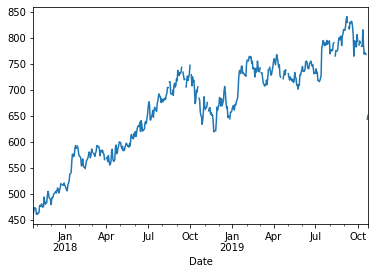

In [15]:
y.plot()

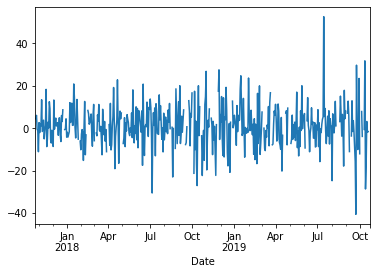

In [16]:
y.diff(1).plot()

In [17]:
y.diff()

Date
2017-10-24      NaN
2017-10-25    4.400
2017-10-26    6.025
2017-10-27   -0.500
2017-10-30   -1.125
              ...  
2019-10-17   -1.950
2019-10-18   -1.650
2019-10-21      NaN
2019-10-22      NaN
2019-10-23    7.050
Freq: B, Name: Close Price, Length: 522, dtype: float64

In [20]:
df1 = pd.DataFrame(y)

In [22]:
df1["d1"] = y.diff(1)

In [25]:
df1.head(20)

,Close Price,d1
Date,,
2017-10-24,463.250,NaN
2017-10-25,467.650,4.400
2017-10-26,473.675,6.025
2017-10-27,473.175,-0.500
2017-10-30,472.050,-1.125
2017-10-31,460.925,-11.125
2017-11-01,463.525,2.600
2017-11-02,461.450,-2.075
2017-11-03,463.325,1.875


In [29]:
df1["c1"] = (463.250 + df1.d1.cumsum()).head(20)

In [30]:
df1.head(20)

,Close Price,d1,c1
Date,,,
2017-10-24,463.250,NaN,NaN
2017-10-25,467.650,4.400,467.650
2017-10-26,473.675,6.025,473.675
2017-10-27,473.175,-0.500,473.175
2017-10-30,472.050,-1.125,472.050
2017-10-31,460.925,-11.125,460.925
2017-11-01,463.525,2.600,463.525
2017-11-02,461.450,-2.075,461.450
2017-11-03,463.325,1.875,463.325


In [36]:
df1["e1"] = df1["Close Price"].rolling(3).mean().shift(1)

In [37]:
import numpy as np

In [38]:
np.mean([463.250, 467.650, 473.675])

468.19166666666666

In [39]:
df1.head(20)

,Close Price,d1,c1,e1
Date,,,,
2017-10-24,463.250,NaN,NaN,NaN
2017-10-25,467.650,4.400,467.650,NaN
2017-10-26,473.675,6.025,473.675,NaN
2017-10-27,473.175,-0.500,473.175,468.191667
2017-10-30,472.050,-1.125,472.050,471.500000
2017-10-31,460.925,-11.125,460.925,472.966667
2017-11-01,463.525,2.600,463.525,468.716667
2017-11-02,461.450,-2.075,461.450,465.500000
2017-11-03,463.325,1.875,463.325,461.966667


In [45]:
df2 = df1[["Close Price", "e1"]].dropna()
df2.head(20)

,Close Price,e1
Date,,
2017-10-27,473.175,468.191667
2017-10-30,472.050,471.500000
2017-10-31,460.925,472.966667
2017-11-01,463.525,468.716667
2017-11-02,461.450,465.500000
2017-11-03,463.325,461.966667
2017-11-06,464.350,462.766667
2017-11-07,477.750,463.041667
2017-11-08,476.150,468.475000


In [46]:
from sklearn import metrics

In [47]:
metrics.r2_score(df2["Close Price"], df2["e1"])

0.9836936118796309

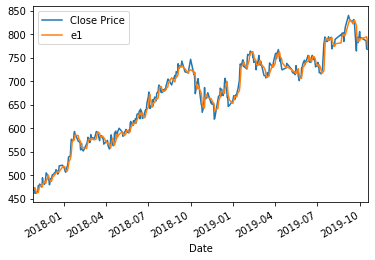

In [48]:
df2[["Close Price", "e1"]].plot()

In [49]:
df1.shape

(522, 4)

In [50]:
df2.shape

(408, 2)